## Import Libraries:

In [5]:
!pip install pydotplus
!pip install graphviz

import pandas as pd

from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import pydotplus
import graphviz

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Dataset:

In [7]:
iris_df = pd.read_csv('Iris.csv')

In [8]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
#Load the input variables into X
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

#Load the output variable into y
y = iris_df['Species'].values

## Modelling:


In [10]:
#Create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the training data X_train and y_train
dec_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualization:

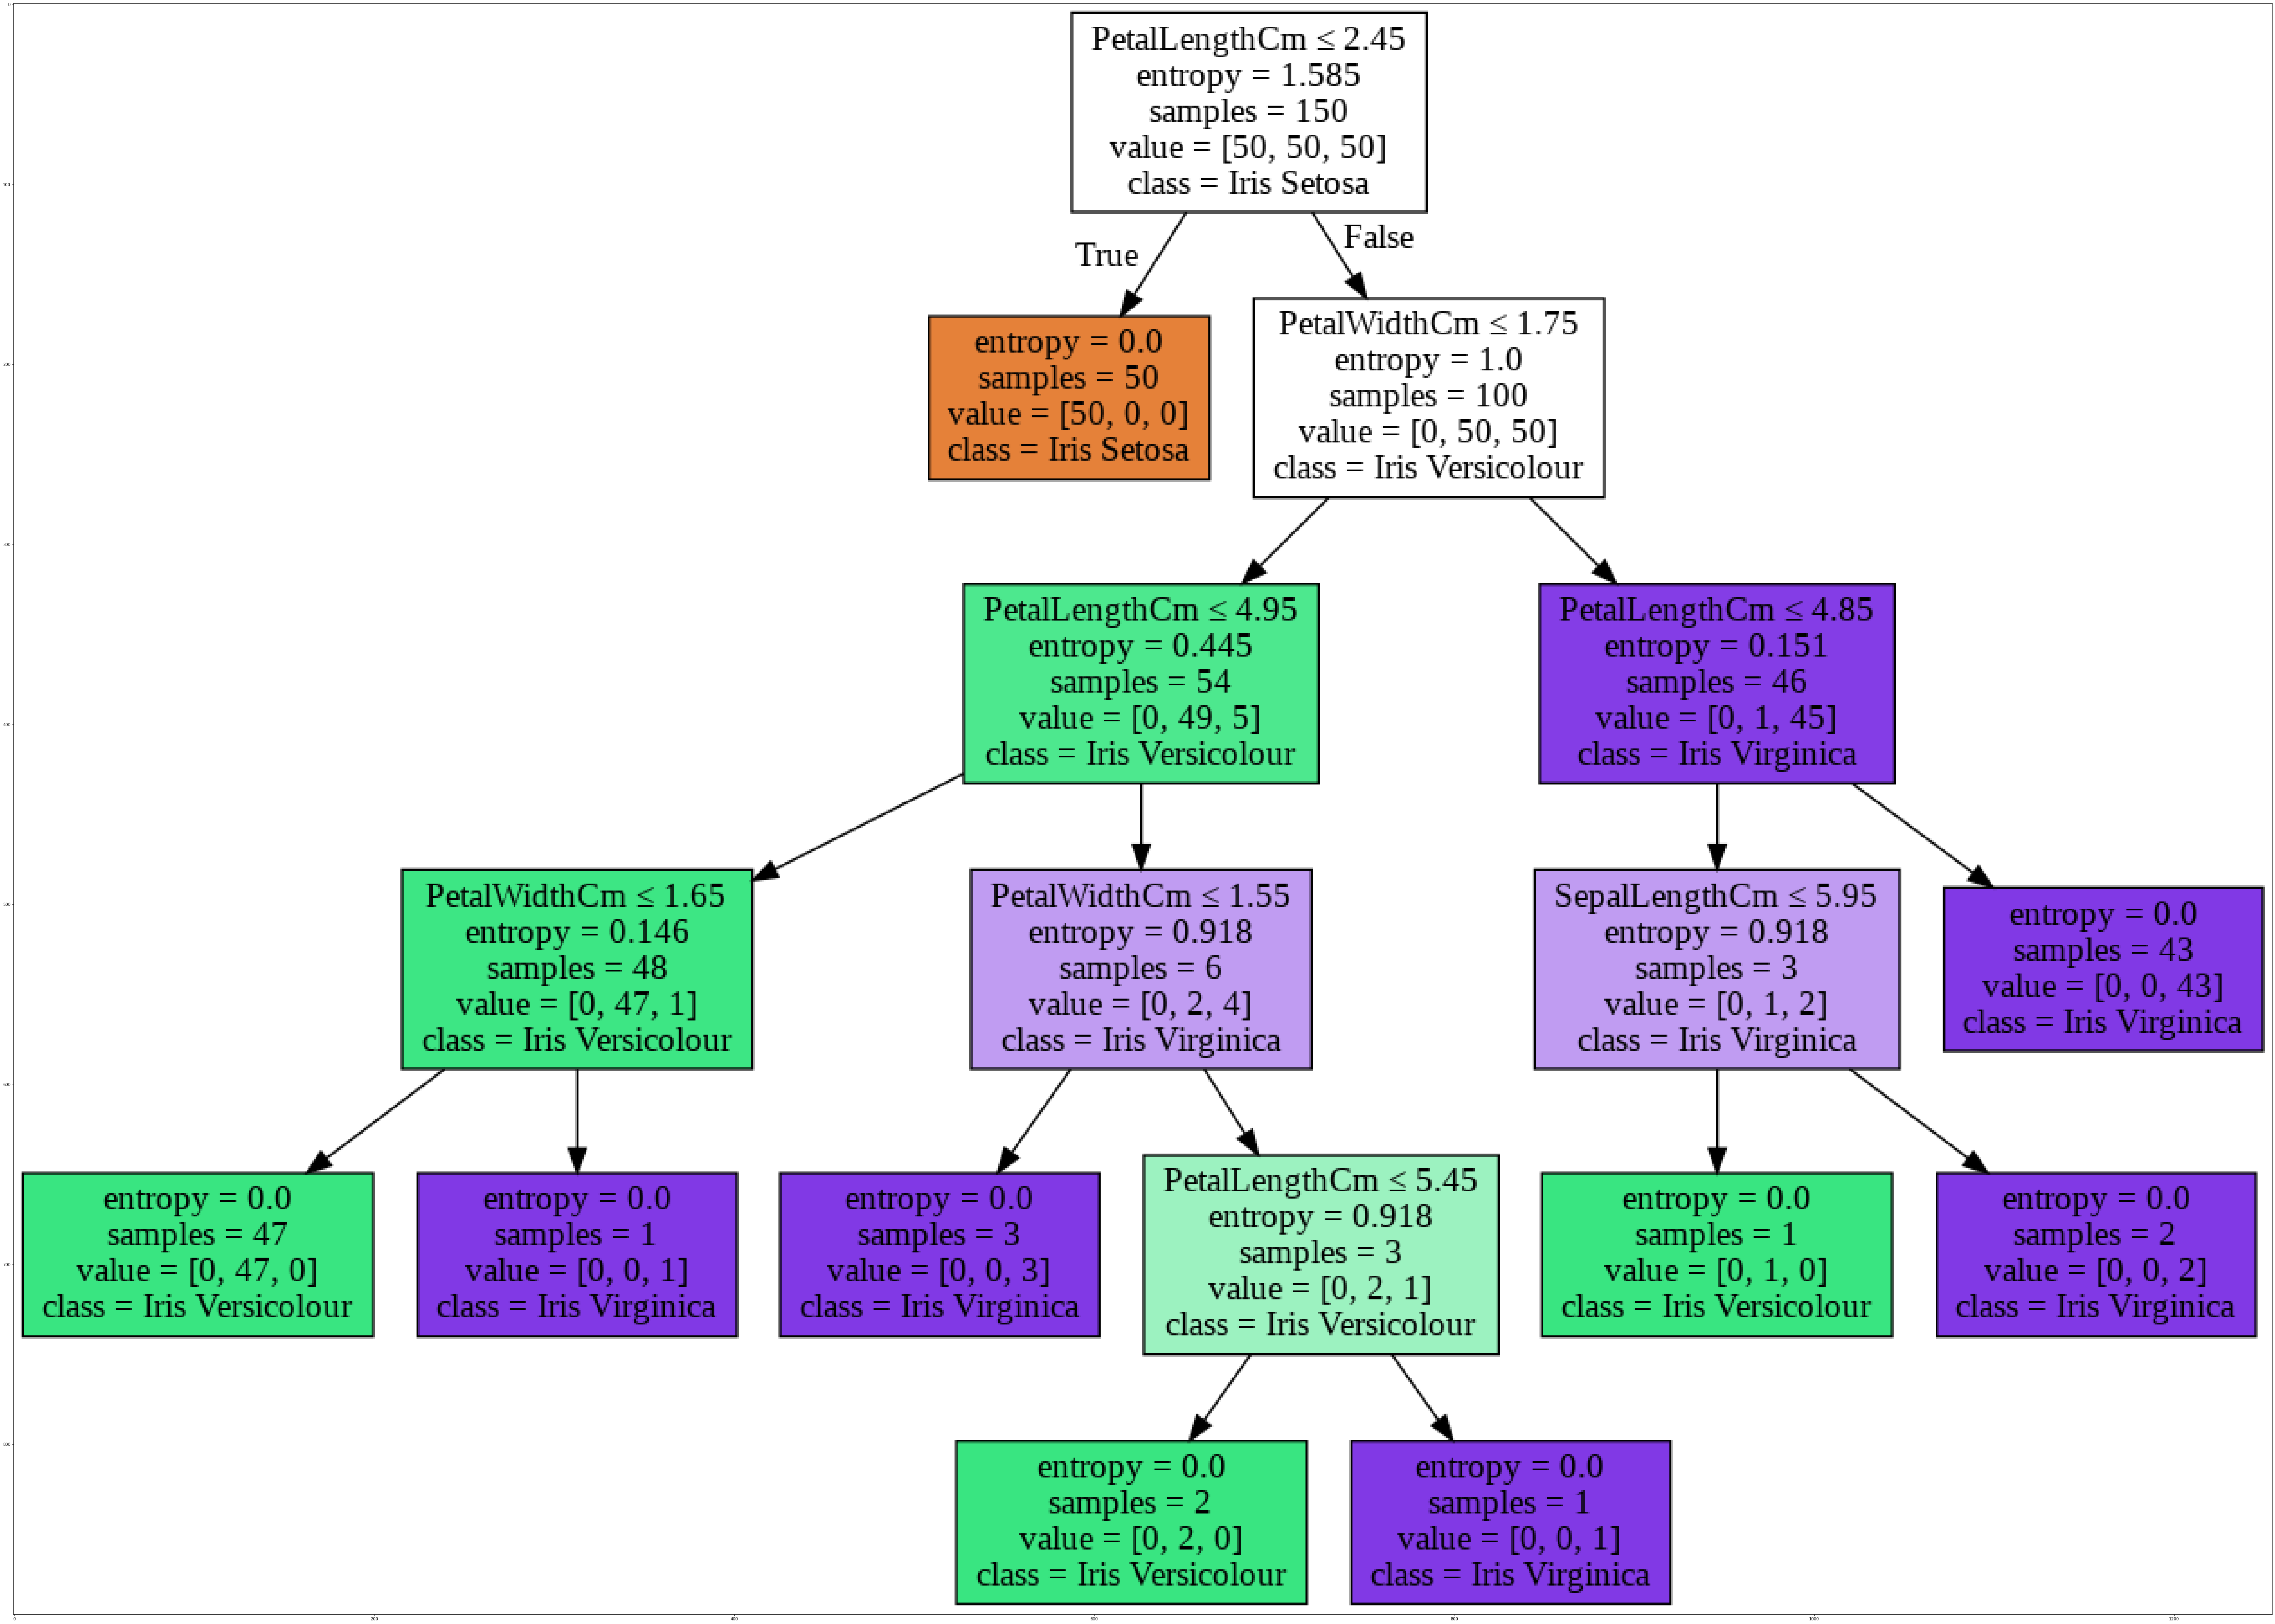

In [11]:
#initialize a StringIO class
dot_data = StringIO()

#file name to save the image
filename = "iris_flower_tree.png"

feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] #input values
class_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'] #output values

#convert the decision tree model into dot data
out = export_graphviz(dec_tree,
                      feature_names=feature_names,
                      out_file=dot_data,
                      class_names=class_names,
                      filled=True,
                      special_characters=True,
                      rotate=False)

#convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#save the graph
graph.write_png(filename)

#open and plot the graph
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest');